In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.legendre as legendre

from genquad import *
from testproblems import *
from functionfamiliy import *

Generate test example

In [9]:
eps_disc = 1e-8
eps_comp = 1e2*eps_disc
eps_quad = None
I = Interval(1e-6,1)
F = example_problem(I, number_of_functions = 10, expr_gen=gen_poly_and_sing)
ex_f, ex_f_expr = F.generate_example_function()
ex_f_expr

-0.332795707418387/x**1.20670502747143 + 1.34719503959212*x**4 + 2.56899622235013*x**3 + 1.47830915650669*x**2 + 0.968128519992563*x - 1.46099813552838

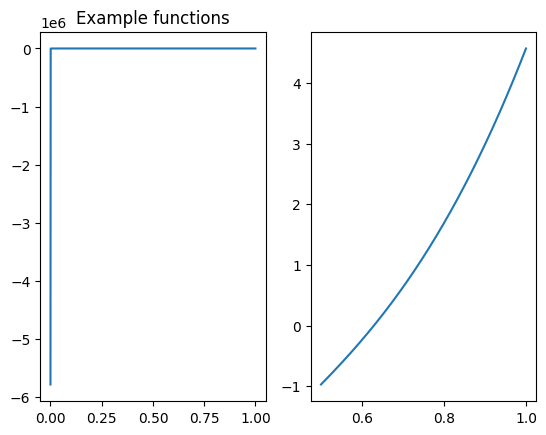

In [10]:
plt.figure("Example function")
xx = np.linspace(I.a,I.b,1000)
functions_to_plot = 5
plt.subplot(1, 2, 1)
plt.title("Example functions")
plt.plot(xx,ex_f(xx))
plt.subplot(1, 2, 2)
xx2 = np.linspace((I.a+I.b)/2,I.b,1000)
plt.plot(xx2,ex_f(xx2))

Discretize and compress

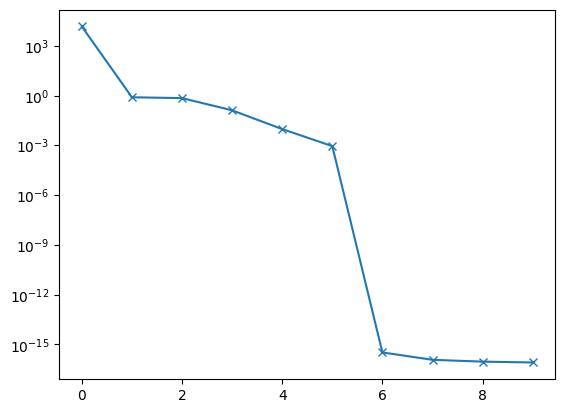

In [11]:
x, w, endpoints, D = adaptive_discretization(F, precision=eps_disc, k=30, verbose=False)
U, A, rank = compress_sequence_of_functions(F, x, w, precision=eps_comp)
Q,R,perm = sp.linalg.qr(A, pivoting = True)
plt.semilogy(np.abs(np.diag(R)),"-x")

(1e-06, 1.0)

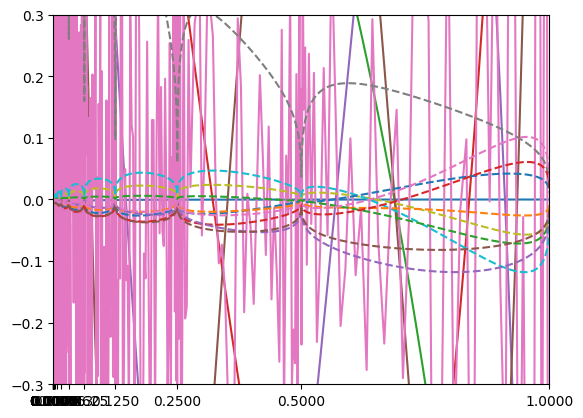

In [12]:
plt.figure();
plt.xticks(endpoints);
plt.plot(x,U);
plt.plot(x,A,"--");
plt.ylim(-0.3,0.3)
plt.xlim(I.a,I.b)

Chebyshev

In [16]:
r = U.T@w
k = len(r)

B = np.sqrt(w)*U.T
Q,R,perm = sp.linalg.qr(B, pivoting=True)
z = np.linalg.solve(R[:k,:k], Q.T@r) ## No Hermetian transpose in python? For now only support real functions.

idx = perm[:k]
x_cheb = x[idx]
w_cheb = z*np.sqrt(w[idx])

Example function integration test

-25.9559484474815 -25.955948447482122 -25.95594844748213


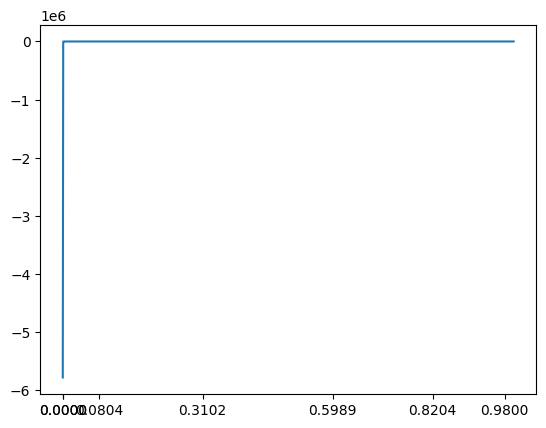

In [17]:
plt.plot(xx,ex_f(xx));
plt.xticks(x_cheb)
print(F.target_integral(ex_f_expr), ex_f(x)@w, ex_f(x_cheb)@w_cheb)

Point comparison

[0.025 0.129 0.297 0.5   0.703 0.871 0.975]
[1.000000e-06 9.800196e-01 8.204309e-01 1.200000e-06 5.988903e-01
 3.101755e-01 8.040170e-02]


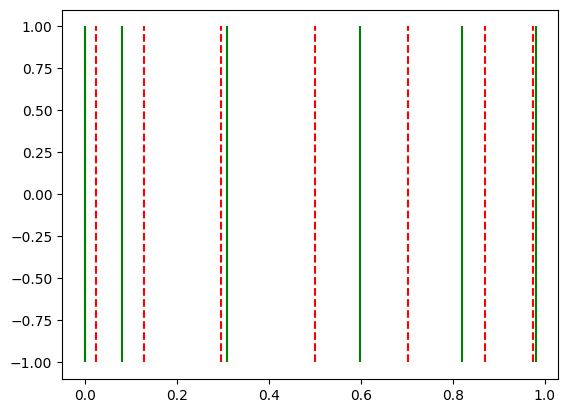

In [18]:
plt.figure()
plt.vlines(x = x_cheb, ymin=-1, ymax=1, colors = 'green',)
x_gl,_ = I.translate(np.polynomial.legendre.leggauss(rank))
plt.vlines(x = x_gl, ymin=-1, ymax=1, colors = 'red', linestyles=["dashed"])
print(np.around(x_gl,3))
print(np.around(x_cheb,7))

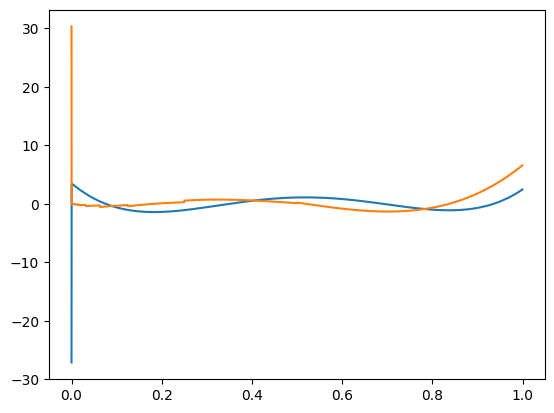

In [26]:
n = 5
plt.plot(x,U[:,n])
plt.plot(x,D@U[:,n])

In [48]:
k = 1
J = (D@U).T*w
A = np.linalg.inv(J@J.T)
Jk = J
Jk[:,k] = 0

print(J.shape)

sp.linalg.norm(Jk@Jk - (J@J - J[:,k]@(J[:,k].T))) 

(7, 1140)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 1140)